In [4]:
#staring the project
#importing necessity libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")  

performing all the inputs using configuration file


In [5]:

from configparser import ConfigParser
config = ConfigParser()
config.readfp(open('config'))
input_path = config.get('My Section', 'input_path')

Importing the dataset

In [6]:
#reading a dataset
dataFrame = pd.read_excel(input_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.xlsx'

In [7]:
dataFrame.head() 

NameError: name 'dataFrame' is not defined

Some Initial domian knowledge before exploring the dataset required for each column.
Total 9 features we have 


In [22]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105828 entries, 0 to 105827
Data columns (total 9 columns):
Date Of Test                105828 non-null datetime64[ns]
Signal (dBm)                105821 non-null float64
Speed (m/s)                 105828 non-null float64
Distance from site (m)      95469 non-null float64
Call Test Duration (s)      105828 non-null float64
Call Test Result            105828 non-null object
Call Test Technology        105828 non-null object
Call Test Setup Time (s)    105828 non-null float64
MOS                         105828 non-null float64
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 7.3+ MB


In [23]:
dataFrame.shape

(105828, 9)

# #Exploratory Data analysis

In [24]:
dataFrame.describe()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Setup Time (s),MOS
count,105821.000000,105828.000000,95469.000000,105828.000000,105828.000000,105828.000000
mean,-78.653623,8.629296,7797.172461,84.202264,2.662776,3.105864
std,18.631699,18.008427,49584.213355,66.250741,2.057087,1.252348
min,-140.000000,-1.000000,1.410000,12.900000,0.000000,1.000000
25%,-92.000000,0.000000,236.580000,60.000000,0.640000,2.100000
50%,-79.000000,0.000000,430.350000,90.000000,3.510000,3.100000
75%,-63.000000,7.770000,789.960000,90.000000,4.080000,4.400000
max,-51.000000,86.310516,745483.680000,900.000000,45.330000,4.400000


from this we can observe that the distance from site has very high variance . max value is too high so we have say that their might be chance of outlier present in this column.

In [25]:
dataFrame.describe(include='all')

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
count,105828,105821.000000,105828.000000,95469.000000,105828.000000,105828,105828,105828.000000,105828.000000
unique,105393,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,2017-10-02 14:28:15,NaN,NaN,NaN,NaN,SUCCESS,UMTS,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,105148,72648,NaN,NaN
first,2017-07-01 00:00:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-10-31 23:50:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-78.653623,8.629296,7797.172461,84.202264,NaN,NaN,2.662776,3.105864
std,NaN,18.631699,18.008427,49584.213355,66.250741,NaN,NaN,2.057087,1.252348
min,NaN,-140.000000,-1.000000,1.410000,12.900000,NaN,NaN,0.000000,1.000000
25%,NaN,-92.000000,0.000000,236.580000,60.000000,NaN,NaN,0.640000,2.100000


In [26]:
#will see for target variable now
#mos is our target variable
dataFrame.columns

Index(['Date Of Test', 'Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)',
       'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology',
       'Call Test Setup Time (s)', 'MOS'],
      dtype='object')

In [27]:
#we have columns names with white spaces will become very case sensitive so will change according to our need
dataFrame.columns=['date_of_test','signal','speed','distance_from_site','call_test_duration','call_test_result','call_test_technology','call_test_setup_time','mos']

In [28]:
dataFrame.columns

Index(['date_of_test', 'signal', 'speed', 'distance_from_site',
       'call_test_duration', 'call_test_result', 'call_test_technology',
       'call_test_setup_time', 'mos'],
      dtype='object')

In [29]:
#exploring target variable
dataFrame.mos.unique()

array([2.1, 3.2, 1. , 3.6, 4.4, 3.7, 4.3, 3.8, 1.7, 2. , 3.3, 2.3, 2.7,
       3.1, 2.2, 1.4, 1.2, 4. , 2.4, 4.1, 1.3, 1.8, 2.5, 3.4, 4.2, 3. ,
       2.6, 3.5, 1.6, 2.9, 2.8, 1.5, 1.9, 3.9, 1.1])

In [30]:
dataFrame.mos.value_counts()

4.4    31011
2.7    16228
1.0    15167
4.3    12528
2.1    12346
3.2     3221
3.3     1158
4.2     1078
2.6     1069
2.2      893
2.3      828
2.4      705
2.0      665
4.1      645
3.7      613
2.5      599
4.0      559
3.1      545
3.4      525
3.8      443
1.9      431
3.6      399
1.1      390
1.8      381
3.0      376
3.9      372
2.9      351
1.7      333
2.8      331
1.6      325
1.5      295
1.2      293
3.5      268
1.4      229
1.3      228
Name: mos, dtype: int64

In [31]:
dataFrame.mos.nunique()

35

In total we have a 35 categories. the problem here is we have total 35 labels for classification prediction. additionally the classes data is totally inbalance rating 4.4=31011 and 1.3=228 . will take some different approach for this at later end

# #Univarate analysis

In [32]:
#signal column

dataFrame.signal.describe()

count    105821.000000
mean        -78.653623
std          18.631699
min        -140.000000
25%         -92.000000
50%         -79.000000
75%         -63.000000
max         -51.000000
Name: signal, dtype: float64

Here we have problem because we have missing values present in the data.
will treat this missing values before proceding with the analysis.

# # Missing_value_handling

In [33]:
#missing value treatment
dataFrame.isnull().sum()

date_of_test                0
signal                      7
speed                       0
distance_from_site      10359
call_test_duration          0
call_test_result            0
call_test_technology        0
call_test_setup_time        0
mos                         0
dtype: int64

we have missing values only in two columns signal =7 and distance_from_site= 10359 . distance_from_site missing values are huge. will handle them.

In [34]:
#imputing values for signal column
#we only have 7 missing values will replace it with mean value of signal column
dataFrame['signal'].fillna((dataFrame['signal'].mean()), inplace=True)

In [35]:
dataFrame.isnull().sum()

date_of_test                0
signal                      0
speed                       0
distance_from_site      10359
call_test_duration          0
call_test_result            0
call_test_technology        0
call_test_setup_time        0
mos                         0
dtype: int64

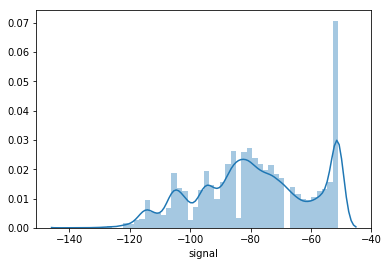

In [36]:
sns.distplot(dataFrame['signal'])

In [37]:
print("Skewness: %f" % dataFrame['signal'].skew())
print("Kurtosis: %f" % dataFrame['signal'].kurt())

Skewness: -0.139220
Kurtosis: -0.831520


we can see that this distribution is close to normal but some increase in the right tail and one large pillar 

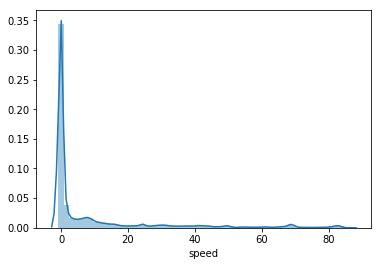

In [38]:
#will finish other integer variables distribution
sns.distplot(dataFrame['speed'])

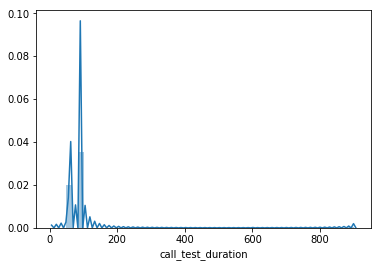

In [39]:
sns.distplot(dataFrame['call_test_duration'])

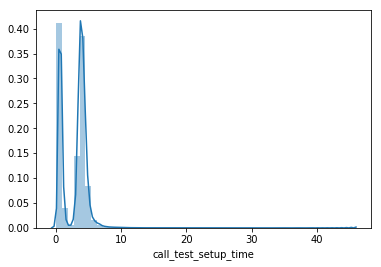

In [40]:
sns.distplot(dataFrame['call_test_setup_time'])

In [41]:
#now will handle the missing value of column distance from site
dataFrame.distance_from_site.isnull().sum()

10359

In [42]:
dataFrame.distance_from_site.describe()

count     95469.000000
mean       7797.172461
std       49584.213355
min           1.410000
25%         236.580000
50%         430.350000
75%         789.960000
max      745483.680000
Name: distance_from_site, dtype: float64

Distance_from_site is having variation in data

As per domain knowledge the maximum coverage any network can have is 35 km

In [43]:
#detecting the outlier

Q1 = dataFrame['distance_from_site'].quantile(0.25)
Q3 = dataFrame['distance_from_site'].quantile(0.75)
print('Q1 :' + str(Q1))
print('Q3 :' + str(Q3))
IQR = Q3 - Q1
print('IQR :' + str(IQR))
print(Q1 - IQR)
print(Q3 + IQR)

Q1 :236.58
Q3 :789.96
IQR :553.38
-316.79999999999995
1343.3400000000001


In [44]:
print('max value : ' + str(dataFrame['distance_from_site'].max()))
print('min value :' + str(dataFrame['distance_from_site'].min()))
print('mean value: '+ str(dataFrame['distance_from_site'].mean()))
print('mode value:'+ str(dataFrame['distance_from_site'].mode()))

max value : 745483.68
min value :1.41
mean value: 7797.172460798688
mode value:0    962.58
dtype: float64


In [45]:
print('No. of records with distance > 100km : ' + str(dataFrame[((dataFrame['distance_from_site'] > 100000))].shape))
print('No. of records with distance > 1343 meter : ' + str(dataFrame[((dataFrame['distance_from_site'] > 1343))].shape))
print('No. of records with distance > 35km : ' + str(dataFrame[((dataFrame['distance_from_site'] > 35000))].shape))

No. of records with distance > 100km : (1853, 9)
No. of records with distance > 1343 meter : (12784, 9)
No. of records with distance > 35km : (2718, 9)


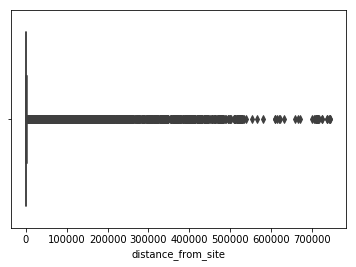

In [46]:
sns.boxplot(dataFrame.distance_from_site)

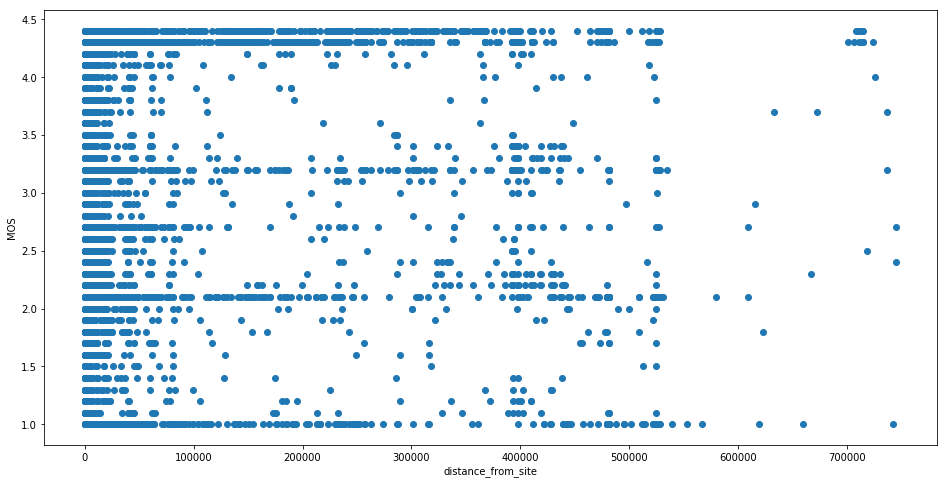

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataFrame['distance_from_site'], dataFrame['mos'])
ax.set_xlabel('distance_from_site')
ax.set_ylabel('MOS')
plt.show()

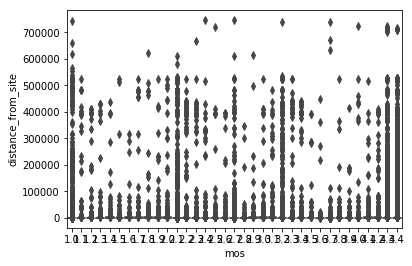

In [48]:
sns.boxplot(x = 'mos' , y = 'distance_from_site' , data = dataFrame)

In [49]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105828 entries, 0 to 105827
Data columns (total 9 columns):
date_of_test            105828 non-null datetime64[ns]
signal                  105828 non-null float64
speed                   105828 non-null float64
distance_from_site      95469 non-null float64
call_test_duration      105828 non-null float64
call_test_result        105828 non-null object
call_test_technology    105828 non-null object
call_test_setup_time    105828 non-null float64
mos                     105828 non-null float64
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 7.3+ MB


In [50]:
dataFrame[((dataFrame['distance_from_site'] > 400000) & (dataFrame['mos'] > 3))].shape

(213, 9)

In [51]:
dataFrame[((dataFrame['distance_from_site'] > 1300))].shape

(13141, 9)

In [52]:
dataFrame['distance_from_site'].shape

(105828,)

In [53]:
dataFrame[(dataFrame['distance_from_site'] > 1343) & (dataFrame['distance_from_site'] < 35000)].shape 

(10066, 9)

Dataloss will be less around(10%)if we choose 1343

AS PER the domain knowledge will exclude the record which is more than 35 km

In [54]:
#outlier removal
dataFrame= dataFrame[(dataFrame['distance_from_site'] < 35000) | dataFrame['distance_from_site'].isna()]

In [55]:
print(dataFrame.shape)
dataFrame['distance_from_site'].mean()

(103110, 9)


923.0450856594289

In [56]:
dataFrame['distance_from_site'].fillna(dataFrame['distance_from_site'].mean(), inplace = True) 

In [57]:
dataFrame.isnull().sum()

date_of_test            0
signal                  0
speed                   0
distance_from_site      0
call_test_duration      0
call_test_result        0
call_test_technology    0
call_test_setup_time    0
mos                     0
dtype: int64

# FEATURE ENGINEERING

#will handle target variable now mos (minimun openion score)

#our approach will be making a group of values range to have better even data distribution and which will make sense

MOS COLUMN (MINIMUM OPENION SCORE)

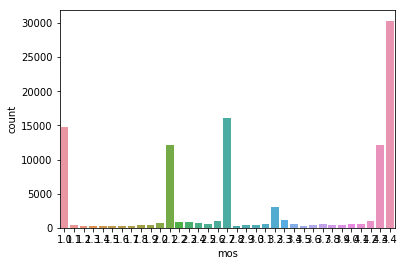

In [58]:
sns.countplot(x=dataFrame.mos)

In [59]:
dataFrame.loc[(dataFrame['mos']>=1 )&(dataFrame['mos']<=2.6),'mos'].shape

(34219,)

In [60]:
dataFrame.loc[(dataFrame['mos']>2.6 )&(dataFrame['mos']<=3.6),'mos'].shape

(22877,)

In [61]:
dataFrame.loc[(dataFrame['mos']>3.6 )&(dataFrame['mos']<=4.4),'mos'].shape

(46014,)

we can create 3 categories of mos

1) Poor 1 - 2.6 2) Average 2.6 - 3.6 3) Good 3.6 - 4.4

In [62]:
dataFrame.loc[(dataFrame['mos']>=1 )&(dataFrame['mos']<=2.6),'mos'] = 2
dataFrame.loc[(dataFrame['mos']>2.6 )&(dataFrame['mos']<=3.6),'mos'] = 3
dataFrame.loc[(dataFrame['mos']>3.6 )&(dataFrame['mos']<=4.4),'mos'] = 4  

In [63]:
dataFrame.mos.value_counts()

4.0    46014
2.0    34219
3.0    22877
Name: mos, dtype: int64

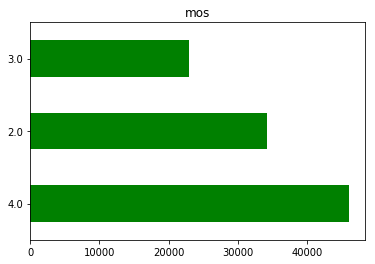

In [64]:
dataFrame['mos'].value_counts().plot(kind= 'barh', color = 'green', title = 'mos')
plt.show()

HANDLING CATEGORICAL DATA

CALL_TEST_RESULT COLUMN

In [65]:
dataFrame.call_test_result.value_counts()

SUCCESS                 102482
FAILURE - DROP CALL        594
FAILURE - SETUP FAIL        34
Name: call_test_result, dtype: int64

In [66]:
dataFrame.groupby('call_test_result')['mos'].value_counts()

call_test_result      mos
FAILURE - DROP CALL   4.0      374
                      2.0      170
                      3.0       50
FAILURE - SETUP FAIL  4.0       23
                      2.0       11
SUCCESS               4.0    45617
                      2.0    34038
                      3.0    22827
Name: mos, dtype: int64

In [67]:
result_replace = {
    "call_test_result" : {
        "SUCCESS": 1,
        "FAILURE - SETUP FAIL": 0,
        "FAILURE - DROP CALL" : 0,
    }
}
dataFrame = dataFrame.replace(result_replace)

In [68]:
dataFrame.groupby('call_test_result')['mos'].value_counts()

call_test_result  mos
0                 4.0      397
                  2.0      181
                  3.0       50
1                 4.0    45617
                  2.0    34038
                  3.0    22827
Name: mos, dtype: int64

HANDLING CALL_TEST_TECHNOLOGY

In [69]:
dataFrame['call_test_technology'].value_counts()

UMTS    70855
LTE     31437
GSM       818
Name: call_test_technology, dtype: int64

In [70]:
dataFrame.groupby('call_test_technology')['mos'].value_counts()

call_test_technology  mos
GSM                   4.0      376
                      2.0      286
                      3.0      156
LTE                   4.0    31241
                      3.0      170
                      2.0       26
UMTS                  2.0    33907
                      3.0    22551
                      4.0    14397
Name: mos, dtype: int64

In [71]:
#one hot encoding
temp_df = pd.get_dummies(dataFrame['call_test_technology'])
dataFrame = pd.concat([dataFrame, temp_df], axis=1)
dataFrame = dataFrame.drop(['call_test_technology'], axis=1)

In [72]:
dataFrame.head()

,date_of_test,signal,speed,distance_from_site,call_test_duration,call_test_result,call_test_setup_time,mos,GSM,LTE,UMTS
0,2017-07-01 00:00:27,-61.0,68.800003,1048.60,90.0,1,0.56,2.0,0,0,1
1,2017-07-01 00:02:57,-61.0,68.769997,1855.54,90.0,1,0.45,3.0,0,0,1
2,2017-07-01 00:05:29,-71.0,69.169998,1685.62,90.0,1,0.51,2.0,0,0,1
3,2017-07-01 00:08:02,-65.0,69.279999,1770.92,90.0,1,0.00,2.0,0,0,1
4,2017-07-01 00:10:30,-103.0,0.820000,256.07,60.0,1,3.35,3.0,0,0,1


HANDLING DATE COLUMN

In [73]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103110 entries, 0 to 105827
Data columns (total 11 columns):
date_of_test            103110 non-null datetime64[ns]
signal                  103110 non-null float64
speed                   103110 non-null float64
distance_from_site      103110 non-null float64
call_test_duration      103110 non-null float64
call_test_result        103110 non-null int64
call_test_setup_time    103110 non-null float64
mos                     103110 non-null float64
GSM                     103110 non-null uint8
LTE                     103110 non-null uint8
UMTS                    103110 non-null uint8
dtypes: datetime64[ns](1), float64(6), int64(1), uint8(3)
memory usage: 7.4 MB


In [74]:
import calendar
dataFrame['hour']=dataFrame['date_of_test'].apply(lambda x:x.hour)
dataFrame['minute']=dataFrame['date_of_test'].apply(lambda x:x.minute)
dataFrame['second']=dataFrame['date_of_test'].apply(lambda x:x.second)
dataFrame['year']=dataFrame['date_of_test'].apply(lambda x:x.year)
dataFrame['month']=dataFrame['date_of_test'].apply(lambda x:x.month)
dataFrame['weekday']=dataFrame['date_of_test'].apply(lambda x:calendar.day_name[x.weekday()])
dataFrame['day']=dataFrame['date_of_test'].apply(lambda x:x.day)

In [75]:
#dropping the year , month , date_of_test column
dataFrame = dataFrame.drop(['year','month','date_of_test'],axis=1)

In [76]:
dataFrame.head()

,signal,speed,distance_from_site,call_test_duration,call_test_result,call_test_setup_time,mos,GSM,LTE,UMTS,hour,minute,second,weekday,day
0,-61.0,68.800003,1048.60,90.0,1,0.56,2.0,0,0,1,0,0,27,Saturday,1
1,-61.0,68.769997,1855.54,90.0,1,0.45,3.0,0,0,1,0,2,57,Saturday,1
2,-71.0,69.169998,1685.62,90.0,1,0.51,2.0,0,0,1,0,5,29,Saturday,1
3,-65.0,69.279999,1770.92,90.0,1,0.00,2.0,0,0,1,0,8,2,Saturday,1
4,-103.0,0.820000,256.07,60.0,1,3.35,3.0,0,0,1,0,10,30,Saturday,1


In [77]:
#here we have weekday column which becomes categorical will transform that too
dataFrame.weekday.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [78]:
#ONE HOT ENCODING
#OneHotEncoder
d_df = pd.get_dummies(dataFrame['weekday'])
dataFrame = pd.concat([dataFrame, d_df], axis=1)
dataFrame = dataFrame.drop(['weekday'], axis=1)

In [79]:
dataFrame.head()

,signal,speed,distance_from_site,call_test_duration,call_test_result,call_test_setup_time,mos,GSM,LTE,UMTS,...,minute,second,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,-61.0,68.800003,1048.60,90.0,1,0.56,2.0,0,0,1,...,0,27,1,0,0,1,0,0,0,0
1,-61.0,68.769997,1855.54,90.0,1,0.45,3.0,0,0,1,...,2,57,1,0,0,1,0,0,0,0
2,-71.0,69.169998,1685.62,90.0,1,0.51,2.0,0,0,1,...,5,29,1,0,0,1,0,0,0,0
3,-65.0,69.279999,1770.92,90.0,1,0.00,2.0,0,0,1,...,8,2,1,0,0,1,0,0,0,0
4,-103.0,0.820000,256.07,60.0,1,3.35,3.0,0,0,1,...,10,30,1,0,0,1,0,0,0,0


In [80]:
#we can remove one moere column 
df11=dataFrame.copy(deep=True)

In [81]:
#we can remove one column 
dataFrame = dataFrame.drop(['Sunday'], axis=1)

In [82]:
dataFrame.head(5)

,signal,speed,distance_from_site,call_test_duration,call_test_result,call_test_setup_time,mos,GSM,LTE,UMTS,hour,minute,second,day,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,-61.0,68.800003,1048.60,90.0,1,0.56,2.0,0,0,1,0,0,27,1,0,0,1,0,0,0
1,-61.0,68.769997,1855.54,90.0,1,0.45,3.0,0,0,1,0,2,57,1,0,0,1,0,0,0
2,-71.0,69.169998,1685.62,90.0,1,0.51,2.0,0,0,1,0,5,29,1,0,0,1,0,0,0
3,-65.0,69.279999,1770.92,90.0,1,0.00,2.0,0,0,1,0,8,2,1,0,0,1,0,0,0
4,-103.0,0.820000,256.07,60.0,1,3.35,3.0,0,0,1,0,10,30,1,0,0,1,0,0,0


In [83]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103110 entries, 0 to 105827
Data columns (total 20 columns):
signal                  103110 non-null float64
speed                   103110 non-null float64
distance_from_site      103110 non-null float64
call_test_duration      103110 non-null float64
call_test_result        103110 non-null int64
call_test_setup_time    103110 non-null float64
mos                     103110 non-null float64
GSM                     103110 non-null uint8
LTE                     103110 non-null uint8
UMTS                    103110 non-null uint8
hour                    103110 non-null int64
minute                  103110 non-null int64
second                  103110 non-null int64
day                     103110 non-null int64
Friday                  103110 non-null uint8
Monday                  103110 non-null uint8
Saturday                103110 non-null uint8
Thursday                103110 non-null uint8
Tuesday                 103110 non-null uint8
Wed

In [84]:
dataFrame.isnull().sum()

signal                  0
speed                   0
distance_from_site      0
call_test_duration      0
call_test_result        0
call_test_setup_time    0
mos                     0
GSM                     0
LTE                     0
UMTS                    0
hour                    0
minute                  0
second                  0
day                     0
Friday                  0
Monday                  0
Saturday                0
Thursday                0
Tuesday                 0
Wednesday               0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

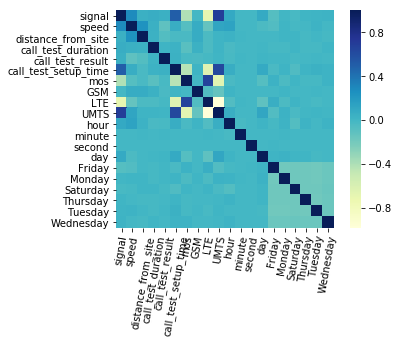

In [85]:
correlations = dataFrame.corr()
sns.heatmap(data= correlations,square =True , cmap = "YlGnBu")
plt.yticks(rotation= 0)
plt.xticks(rotation= 80)

# Python profiling for detail report

In [86]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(dataFrame)

In [87]:
profile

Number of variables,21
Number of observations,103110
Total Missing (%),0.0%
Total size in memory,10.3 MiB
Average record size in memory,105.0 B
Numeric,11
Categorical,0
Boolean,10
Date,0
Text (Unique),0
Rejected,0


# Model Training

In [88]:
x=dataFrame.drop('mos',axis=1)
y=dataFrame['mos']

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=103)

# Feature scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#using Logostic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))
print(classification_report(y_test,predictedvalues))

0.6728413021692045
[[8670 1360  119]
 [4233 2551  112]
 [3569  727 9592]]
              precision    recall  f1-score   support

         2.0       0.53      0.85      0.65     10149
         3.0       0.55      0.37      0.44      6896
         4.0       0.98      0.69      0.81     13888

   micro avg       0.67      0.67      0.67     30933
   macro avg       0.68      0.64      0.63     30933
weighted avg       0.73      0.67      0.68     30933



Logistic Regression gives 67% accuracy lets try another algorithms also

In [92]:
#random forest
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))
print(classification_report(y_test,predictedvalues))

0.7140594187437365
[[ 7501  2034   614]
 [ 2522  3556   818]
 [ 1635  1222 11031]]
              precision    recall  f1-score   support

         2.0       0.64      0.74      0.69     10149
         3.0       0.52      0.52      0.52      6896
         4.0       0.89      0.79      0.84     13888

   micro avg       0.71      0.71      0.71     30933
   macro avg       0.68      0.68      0.68     30933
weighted avg       0.72      0.71      0.72     30933



Random Forest is giving 71% accuracy

In [93]:
#will try gbm 
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gbclassfier = GradientBoostingClassifier(n_estimators=100)
gbclassfier.fit(x_train, y_train)
predictedvalues=gbclassfier.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))
print(classification_report(y_test,predictedvalues))

0.7092425564930657
[[ 7207  2332   610]
 [ 2144  4012   740]
 [ 1842  1326 10720]]
              precision    recall  f1-score   support

         2.0       0.64      0.71      0.68     10149
         3.0       0.52      0.58      0.55      6896
         4.0       0.89      0.77      0.83     13888

   micro avg       0.71      0.71      0.71     30933
   macro avg       0.69      0.69      0.68     30933
weighted avg       0.73      0.71      0.72     30933



Gbm gives us 70% accuracy

So far model Random forest is giving the best accuracy in this condition

will tune random forest further for more better accuracy

# Hyperparameter Tuning

In [95]:
model = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=4, min_samples_split=21, n_estimators=100)
model.fit(x_train, y_train)
predictedvalues=model.predict(x_test)
print(accuracy_score(y_test,predictedvalues))
print(confusion_matrix(y_test, predictedvalues))
print(classification_report(y_test,predictedvalues))

0.7209775967413442
[[ 7465  2129   555]
 [ 2342  3772   782]
 [ 1637  1186 11065]]
              precision    recall  f1-score   support

         2.0       0.65      0.74      0.69     10149
         3.0       0.53      0.55      0.54      6896
         4.0       0.89      0.80      0.84     13888

   micro avg       0.72      0.72      0.72     30933
   macro avg       0.69      0.69      0.69     30933
weighted avg       0.73      0.72      0.73     30933



# doing some hyperparameter this is the best accuracy i get 72.13%

# creating serializable object

In [96]:
import pickle
file = 'MobileClassifier'
pickle.dump(model, open(file, 'wb'))